In [1]:
import pyfits as pf
import h5py
import numpy as np
import matplotlib.pyplot as plt
%pylab inline
import pandas as pd
import seaborn as sns 
import itertools
sns.set_style("white")
sns.set_context("notebook", font_scale=1.0, rc={"lines.linewidth": 2.5})
sns.set_palette(sns.color_palette(["#9b59b6", 
                                   "#e74c3c", "#3498db", 
                                   "#34495e", "#2ecc71"]))
palette = itertools.cycle(sns.color_palette())

Populating the interactive namespace from numpy and matplotlib


In [2]:
cosmos = pf.open("data/KiDS.x.zCOSMOS.fits")[1].data
gama = pf.open("data/KiDSxGAMAequ+G23.fits")[1].data
sdss = pf.open("data/KiDS.DR3.x.SDSS.DR13.galaxies.fits")[1].data
deep = pf.open("data/KiDS-like.x.DEEP2.DR4.fits")[1].data

In [3]:
mask = np.where(np.in1d(sdss['ID'] , gama['ID'])==False)
sdss = sdss[mask]
#getting rid of sdss galaxies that are in GAMA

All these catalogs have different formats. The goal is to combine them and make a consistent catalog of spectroscopic redshifts and KiDS photometry of galaxies. 

In [4]:
def cosmos_reduction():
    
    data = cosmos

    data = data[data['NIMAFLAGS_ISO_THELI']&01010111==0]

    data = data[data['MAGERR_GAAP_U']>0]
    data = data[data['MAGERR_GAAP_G']>0]
    data = data[data['MAGERR_GAAP_R']>0]
    data = data[data['MAGERR_GAAP_I']>0]
    
    data = data[data['MAG_GAAP_u_CALIB']<25.4]
    data = data[data['MAG_GAAP_g_CALIB']<25.6]
    data = data[data['MAG_GAAP_r_CALIB']<24.7]
    data = data[data['MAG_GAAP_i_CALIB']<24.5]
    
    u = data['MAG_GAAP_u_CALIB']
    g = data['MAG_GAAP_g_CALIB']
    r = data['MAG_GAAP_r_CALIB']
    i = data['MAG_GAAP_i_CALIB']
    
    uerr = data['MAGERR_GAAP_U']
    gerr = data['MAGERR_GAAP_G']
    rerr = data['MAGERR_GAAP_R']
    ierr = data['MAGERR_GAAP_I']

    Z = data['Zspec']
    RA = data['RA_THELI']
    DEC = data['DEC_THELI']

    u_g = data['MAG_GAAP_u_CALIB'] - data['MAG_GAAP_g_CALIB']
    g_r = data['MAG_GAAP_g_CALIB'] - data['MAG_GAAP_r_CALIB']
    r_i = data['MAG_GAAP_r_CALIB'] - data['MAG_GAAP_i_CALIB']

    col = np.vstack([u,g,r,i,uerr,gerr,rerr,ierr,u_g,g_r,r_i,Z,RA,DEC])
    
    return col 

In [5]:
def deep_reduction():
    
    data = deep
    data = data[data['NIMAFLAGS_ISO_THELI']&01010111==0]
    data = data[data['MAGERR_GAAP_U']>0]
    data = data[data['MAGERR_GAAP_G']>0]
    data = data[data['MAGERR_GAAP_R']>0]
    data = data[data['MAGERR_GAAP_I']>0]
    
    data = data[data['MAG_GAAP_u_CALIB']<25.4]
    data = data[data['MAG_GAAP_g_CALIB']<25.6]
    data = data[data['MAG_GAAP_r_CALIB']<24.7]
    data = data[data['MAG_GAAP_i_CALIB']<24.5]
    
    u = data['MAG_GAAP_u_CALIB']
    g = data['MAG_GAAP_g_CALIB']
    r = data['MAG_GAAP_r_CALIB']
    i = data['MAG_GAAP_i_CALIB']
    
    uerr = data['MAGERR_GAAP_U']
    gerr = data['MAGERR_GAAP_G']
    rerr = data['MAGERR_GAAP_R']
    ierr = data['MAGERR_GAAP_I']

    Z = data['Zspec']
    RA = data['RA_THELI']
    DEC = data['DEC_THELI']

    u_g = data['MAG_GAAP_u_CALIB'] - data['MAG_GAAP_g_CALIB']
    g_r = data['MAG_GAAP_g_CALIB'] - data['MAG_GAAP_r_CALIB']
    r_i = data['MAG_GAAP_r_CALIB'] - data['MAG_GAAP_i_CALIB']

    col = np.vstack([u,g,r,i,uerr,gerr,rerr,ierr,u_g,g_r,r_i,Z,RA,DEC])
    
    return col

In [6]:
def gama_reduction():
    
    data = gama
    
    data = data[data['IMAFLAGS_ISO_U']&01010111==0]
    data = data[data['IMAFLAGS_ISO_G']&01010111==0]
    data = data[data['IMAFLAGS_ISO_R']&01010111==0]
    data = data[data['IMAFLAGS_ISO_I']&01010111==0]
    
    data = data[data['MAGERR_GAAP_U']>0]
    data = data[data['MAGERR_GAAP_G']>0]
    data = data[data['MAGERR_GAAP_R']>0]
    data = data[data['MAGERR_GAAP_I']>0]
    
    data = data[data['MAG_GAAP_u_CALIB']<25.4]
    data = data[data['MAG_GAAP_g_CALIB']<25.6]
    data = data[data['MAG_GAAP_r_CALIB']<24.7]
    data = data[data['MAG_GAAP_i_CALIB']<24.5]
    
    u = data['MAG_GAAP_u_CALIB']
    g = data['MAG_GAAP_g_CALIB']
    r = data['MAG_GAAP_r_CALIB']
    i = data['MAG_GAAP_i_CALIB']
    
    uerr = data['MAGERR_GAAP_U']
    gerr = data['MAGERR_GAAP_G']
    rerr = data['MAGERR_GAAP_R']
    ierr = data['MAGERR_GAAP_I']

    Z = data['Z']
    RA = data['RA']
    DEC = data['DEC']

    u_g = data['COLOR_GAAPHOM_U_G']
    g_r = data['COLOR_GAAPHOM_G_R']
    r_i = data['COLOR_GAAPHOM_R_I']
    
    col = np.vstack([u,g,r,i,uerr,gerr,rerr,ierr,u_g,g_r,r_i,Z,RA,DEC])
    
    return col

def sdss_reduction():
    
    data = sdss
    
    data = data[data['IMAFLAGS_ISO_U']&01010111==0]
    data = data[data['IMAFLAGS_ISO_G']&01010111==0]
    data = data[data['IMAFLAGS_ISO_R']&01010111==0]
    data = data[data['IMAFLAGS_ISO_I']&01010111==0]
    
    data = data[data['MAGERR_GAAP_U']>0]
    data = data[data['MAGERR_GAAP_G']>0]
    data = data[data['MAGERR_GAAP_R']>0]
    data = data[data['MAGERR_GAAP_I']>0]

    u = data['MAG_GAAP_U'] + data['ZPT_OFFSET_U'] - data['EXT_SFD_U']
    g = data['MAG_GAAP_G'] + data['ZPT_OFFSET_G'] - data['EXT_SFD_G']
    r = data['MAG_GAAP_R'] + data['ZPT_OFFSET_R'] - data['EXT_SFD_R']
    i = data['MAG_GAAP_I'] + data['ZPT_OFFSET_I'] - data['EXT_SFD_I']
    
    mask = (u<25.4)&(g<25.6)&(r<24.7)&(i<24.5) 
    
    data = data[mask]
    
    u = data['MAG_GAAP_U'] + data['ZPT_OFFSET_U'] - data['EXT_SFD_U']
    g = data['MAG_GAAP_G'] + data['ZPT_OFFSET_G'] - data['EXT_SFD_G']
    r = data['MAG_GAAP_R'] + data['ZPT_OFFSET_R'] - data['EXT_SFD_R']
    i = data['MAG_GAAP_I'] + data['ZPT_OFFSET_I'] - data['EXT_SFD_I']
    
    uerr = data['MAGERR_GAAP_U']
    gerr = data['MAGERR_GAAP_G']
    rerr = data['MAGERR_GAAP_R']
    ierr = data['MAGERR_GAAP_I']

    Z = data['Z']
    RA = data['RA']
    DEC = data['DEC']

    u_g = data['COLOR_GAAPHOM_U_G']
    g_r = data['COLOR_GAAPHOM_G_R']
    r_i = data['COLOR_GAAPHOM_R_I']

    col = np.vstack([u,g,r,i,uerr,gerr,rerr,ierr,u_g,g_r,r_i,Z,RA,DEC])
    
    return col


In [7]:
dp = gama_reduction()
dp = np.hstack([gama_reduction() , sdss_reduction()])
#dp = np.hstack([gama_reduction() , sdss_reduction() , cosmos_reduction()])
zdp = dp[11,:]

In [72]:
mask = (zdp>.75) & (zdp<.8)
dpp = dp[:,mask]
print dpp.shape

(14, 312)


In [73]:
from astroML.density_estimation import XDGMM
from matplotlib.patches import Ellipse
from astroML.plotting.tools import draw_ellipse

In [74]:
Y = np.vstack([dpp[3,:], dpp[10,:]]).T
Yerr = np.zeros((Y.shape[0] , 2 , 2))
Yerr[:,0,0] = dpp[7,:]
Yerr[:,1,1] = (dpp[6,:]**2 + dpp[7,:]**2)**1
Yerr[:,0,1] = -1.*dpp[7,:]**2
Yerr[:,1,0] = -1.*dpp[7,:]**2

In [75]:
clf = XDGMM(2, n_iter=400)
clf.fit(Y, Yerr)

/usr/lib64/python2.7/site-packages/sklearn/utils/deprecation.py:52: DeprecationWarning: Class GMM is deprecated; The class GMM is deprecated in 0.18 and will be  removed in 0.20. Use class GaussianMixture instead.
  warnings.warn(msg, category=DeprecationWarning)
/usr/lib64/python2.7/site-packages/sklearn/utils/deprecation.py:70: DeprecationWarning: Function distribute_covar_matrix_to_match_covariance_type is deprecated; The functon distribute_covar_matrix_to_match_covariance_typeis deprecated in 0.18 and will be removed in 0.20.
  warnings.warn(msg, category=DeprecationWarning)
/usr/lib64/python2.7/site-packages/sklearn/utils/deprecation.py:70: DeprecationWarning: Function log_multivariate_normal_density is deprecated; The function log_multivariate_normal_density is deprecated in 0.18 and will be removed in 0.20.
  warnings.warn(msg, category=DeprecationWarning)
/usr/lib64/python2.7/site-packages/sklearn/utils/deprecation.py:70: DeprecationWarning: Function log_multivariate_normal_den

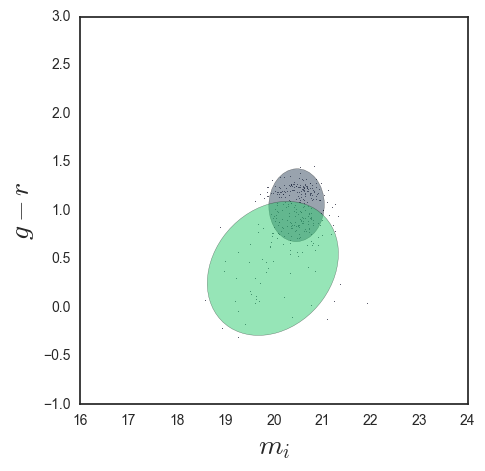

In [76]:
plt.figure(figsize=(5,5))
plt.scatter(dpp[3,:] , dpp[10,:] , s = 0.1)
for i in range(2):
    draw_ellipse(clf.mu[i], clf.V[i] , scales=[2] , ec='k', fc=next(palette) , alpha = 0.5)
plt.xlim([16,24])
plt.ylim([-1,3])
plt.xlabel(r"$m_{i}$" , fontsize = 20)
plt.ylabel(r"$g-r$" , fontsize = 20)

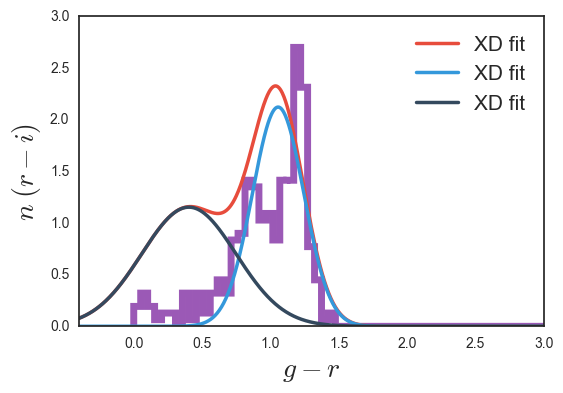

In [77]:
from scipy.stats import norm
bins = np.linspace(0,3,60)
plt.hist(Y[:,1] , normed=True , histtype="step" , lw = 5 , bins=bins)
x = np.linspace(-1,3,1000)
plt.plot(x , norm.pdf(x, clf.mu[0,1], clf.V[0,1,1]**.5) + norm.pdf(x, clf.mu[1,1], clf.V[1,1,1]**.5), label = "XD fit")
plt.plot(x , norm.pdf(x, clf.mu[0,1], clf.V[0,1,1]**.5), label = "XD fit")
plt.plot(x , norm.pdf(x, clf.mu[1,1], clf.V[1,1,1]**.5), label = "XD fit")
plt.xlabel(r"$g-r$" , fontsize = 20)
plt.ylabel(r"$n\;(r-i)$" , fontsize = 20)
plt.xlim(-0.4,3)
plt.legend(fontsize = 15)

In [78]:
red_index = np.where(clf.mu[:,1] == clf.mu[:,1].max())[0]
mu_red , V_red= clf.mu[red_index] , clf.V[red_index][0]
red_line = mu_red[0,1] + V_red[0,1]*(Y[:,0] - mu_red[0,0])/V_red[0,0]
red_scatter = V_red[1,1] - V_red[0,1]**2./V_red[0,0]

chi = (Y[:,1] - red_line)**2. / (red_scatter + Yerr[:,1,1])
mask = chi < 2
#mask = (Y[:,1]>red_line - red_scatter**.5)&(Y[:,1]<red_line + red_scatter**.5)



pure_index = np.where(clf.mu[:,1] == clf.mu[:,1].max())
mu_pure , V_pure = clf.mu[pure_index] , clf.V[pure_index][0]
dY_pure = Y - mu_pure
V_pure_inv = np.linalg.inv(V_pure)
VdY = np.tensordot(V_pure_inv, dY_pure , axes=(1,1))
P = np.linalg.inv(V_pure + Yerr)
chi = np.einsum('mn,mn->m', np.einsum('ijk,ik->ij', P, dY_pure) , dY_pure)
mask = chi<2

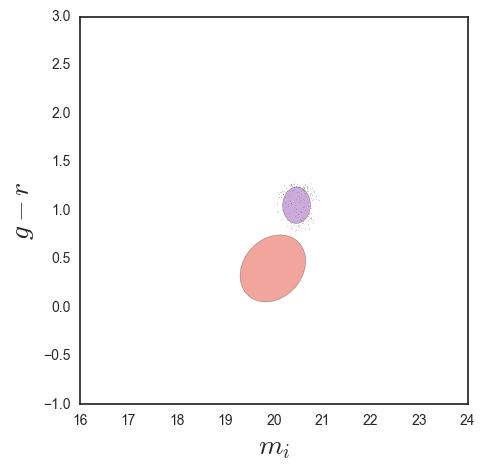

In [79]:
plt.figure(figsize=(5,5))
plt.scatter(Y[mask,0] , Y[mask,1] , s = 0.01)
for i in range(2):
    draw_ellipse(clf.mu[i],
                 clf.V[i] , scales=[1] , ec='k', fc=next(palette) , alpha = 0.5)
plt.xlim([16,24])
plt.ylim([-1,3])
plt.xlabel(r"$m_{i}$" , fontsize = 20)
plt.ylabel(r"$g-r$" , fontsize = 20)

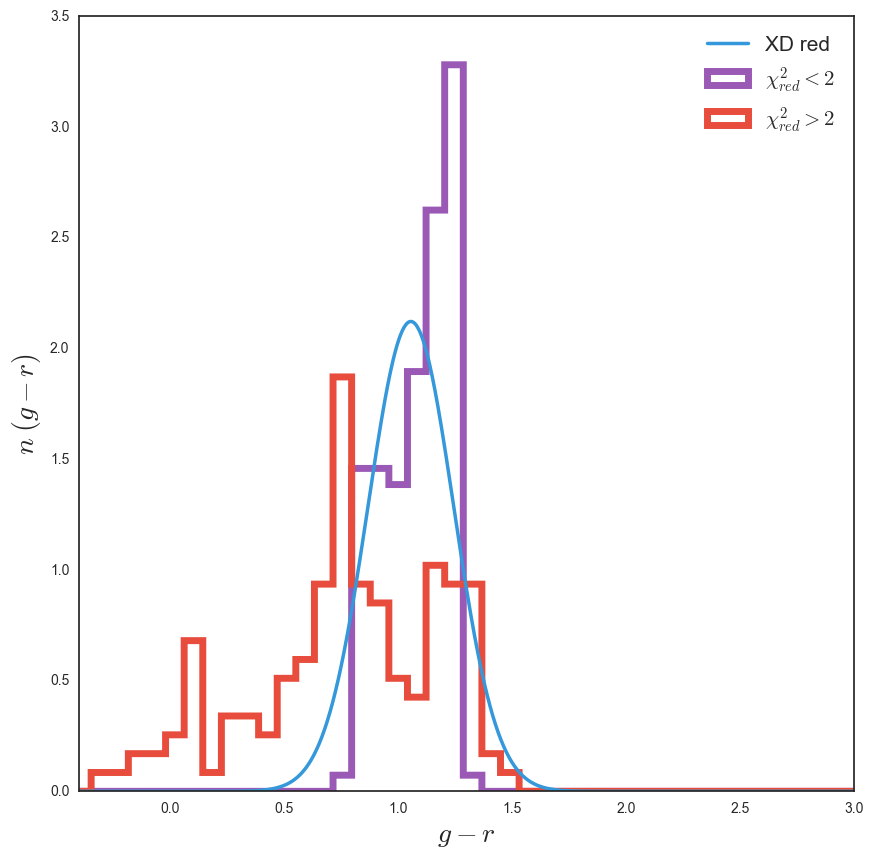

In [80]:
plt.figure(figsize=(10,10))
bins = np.linspace(-1,3,50)
plt.hist(Y[mask,1] , normed=True , histtype="step" , lw = 5 , bins=bins , label = "$\chi_{red}^2<2$")
plt.hist(Y[~mask,1] , normed=True , histtype="step" , lw = 5 , bins=bins, label = "$\chi_{red}^2>2$")
x = np.linspace(-1,3,1000)
plt.plot(x , norm.pdf(x, mu_red[0,1], V_red[1,1]**.5) , label = "XD red")
plt.xlabel(r"$g-r$" , fontsize = 20)
plt.ylabel(r"$n\;(g-r)$" , fontsize = 20)
plt.xlim(-0.4,3)
plt.legend(loc = "best" , fontsize = 15)

In [81]:
def lnlike(theta, x, y, yerr ,xref):
    m, b, lnf = theta
    model = m * (x-xref) + b
    inv_sigma2 = 1.0/(yerr**2 + np.exp(2*lnf))
    return -0.5*(np.sum((y-model)**2*inv_sigma2 - np.log(inv_sigma2)))
import scipy.optimize as op
nll = lambda *args: -lnlike(*args)

0.0829987887826 1.42335836384 0.412419751344


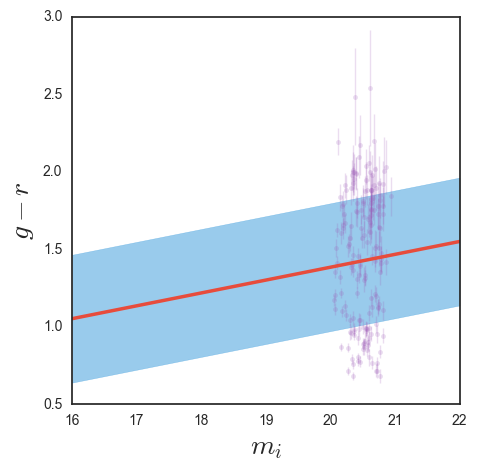

In [82]:
result = op.minimize(nll, [0.0, mu_red[0,1], np.log(V_red[1,1]**.5)],   #initial guess
                           args=(Y[mask,0], dpp[9,mask], (dpp[5,mask]**2+dpp[6,mask]**2)**.5 ,mu_red[0,0])) #arguments of lnlike
m_ml, b_ml, lnf_ml = result["x"]
plt.figure(figsize=(5,5))
mi = np.linspace(16,22,1000)
plt.errorbar(Y[mask,0], dpp[9,mask] , yerr= (dpp[5,mask]**2+dpp[6,mask]**2)**.5 , 
             fmt = '.' , capsize = 0, alpha =0.2 , elinewidth=1)
#plt.errorbar(Y[~mask,0], Y[~mask,1] , yerr= Yerr[~mask,1,1]**.5 , 
#             fmt = '.' , capsize = 0, alpha =0.2 , elinewidth=1)
plt.plot(mi , m_ml*(mi-mu_red[0,0]) + b_ml)

plt.fill_between(mi , m_ml*(mi-mu_red[0,0]) + b_ml - np.exp(lnf_ml)  , 
                 m_ml*(mi-mu_red[0,0]) + b_ml + np.exp(lnf_ml) , alpha = 0.5 , color = next(palette))
plt.xlabel(r"$m_i$" , fontsize = 20)
plt.ylabel(r"$g - r$" , fontsize = 20)
print m_ml, b_ml, np.exp(lnf_ml)

-0.0203458869682 1.08744646437 0.140394792001


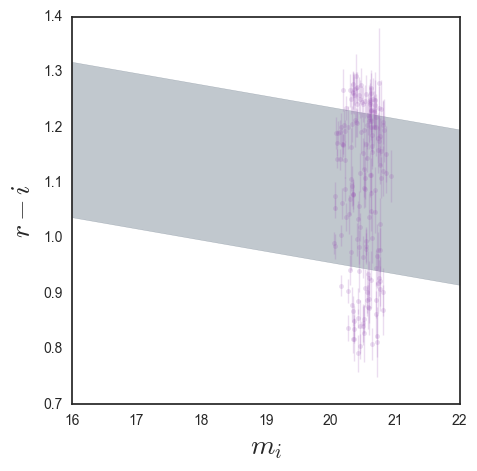

In [83]:
result = op.minimize(nll, [0.0, mu_red[0,1], np.log(V_red[1,1]**.5)],  #initial guess
                    args=(Y[mask,0], dpp[10,mask], (dpp[6,mask]**2+dpp[7,mask]**2)**.5 ,mu_red[0,0])) #arguments of lnlike
m_ml, b_ml, lnf_ml = result["x"]
plt.figure(figsize=(5,5))
mi = np.linspace(16,22,1000)
plt.errorbar(Y[mask,0], dpp[10,mask] , yerr= (dpp[6,mask]**2+dpp[7,mask]**2)**.5, 
             fmt = '.' , capsize = 0, alpha =0.2 , elinewidth=1)
plt.fill_between(mi , m_ml*(mi-mu_red[0,0]) + b_ml - np.exp(lnf_ml)  , 
                 m_ml*(mi-mu_red[0,0]) + b_ml + np.exp(lnf_ml) , alpha = 0.3, color = next(palette))
plt.xlabel(r"$m_i$" , fontsize = 20)
plt.ylabel(r"$r-i$" , fontsize = 20)
print m_ml, b_ml, np.exp(lnf_ml)

-0.135099589966 0.588286236096 0.14550647755


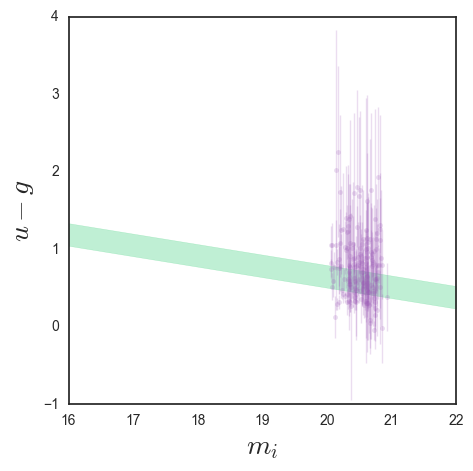

In [84]:
result = op.minimize(nll, [0.0, mu_red[0,1], np.log(V_red[1,1]**.5)], 
                    args=(Y[mask,0], dpp[8,mask], (dpp[4,mask]**2+dpp[5,mask]**2)**.5 ,mu_red[0,0]))
m_ml, b_ml, lnf_ml = result["x"]
#print m_ml , b_ml , np.exp(lnf_ml) , mu_red[0,0]
plt.figure(figsize=(5,5))
mi = np.linspace(16,22,1000)
plt.errorbar(Y[mask,0], dpp[8,mask] , yerr= (dpp[4,mask]**2+dpp[5,mask]**2)**.5, 
             fmt = '.' , capsize = 0, alpha =0.2 , elinewidth=1)
plt.fill_between(mi , m_ml*(mi-mu_red[0,0]) + b_ml - np.exp(lnf_ml)  , 
                 m_ml*(mi-mu_red[0,0]) + b_ml + np.exp(lnf_ml) , alpha = 0.3, color = next(palette))
plt.xlabel(r"$m_i$" , fontsize = 20)
plt.ylabel(r"$u-g$" , fontsize = 20)
print m_ml , b_ml , np.exp(lnf_ml)

In [85]:
color = dpp[8:11,:]
color_err = np.zeros((3,3,color.shape[1]))
color_err[0,0,:] = dpp[4,:]**2. + dpp[5,:]**2.
color_err[1,1,:] = dpp[5,:]**2. + dpp[6,:]**2.
color_err[2,2,:] = dpp[6,:]**2. + dpp[7,:]**2.
color_err[0,1,:] = -1.* dpp[5,:]**2.
color_err[1,0,:] = -1.* dpp[5,:]**2.
color_err[1,2,:] = -1.* dpp[6,:]**2.
color_err[2,1,:] = -1.* dpp[6,:]**2.

mi_xd = dpp[3,mask]
Y_xd = np.vstack([color[0,mask], color[1,mask], color[2,mask]]).T
Yerr_xd = np.zeros((Y_xd.shape[0] , 3 , 3))
for i in xrange(3):
    for j in xrange(3):
         Yerr_xd[:,i,j] = color_err[i,j,mask]

In [86]:
clf = XDGMM(2, n_iter=400)
clf.fit(Y_xd, Yerr_xd)

/usr/lib64/python2.7/site-packages/sklearn/utils/deprecation.py:52: DeprecationWarning: Class GMM is deprecated; The class GMM is deprecated in 0.18 and will be  removed in 0.20. Use class GaussianMixture instead.
  warnings.warn(msg, category=DeprecationWarning)
/usr/lib64/python2.7/site-packages/sklearn/utils/deprecation.py:70: DeprecationWarning: Function distribute_covar_matrix_to_match_covariance_type is deprecated; The functon distribute_covar_matrix_to_match_covariance_typeis deprecated in 0.18 and will be removed in 0.20.
  warnings.warn(msg, category=DeprecationWarning)
/usr/lib64/python2.7/site-packages/sklearn/utils/deprecation.py:70: DeprecationWarning: Function log_multivariate_normal_density is deprecated; The function log_multivariate_normal_density is deprecated in 0.18 and will be removed in 0.20.
  warnings.warn(msg, category=DeprecationWarning)
/usr/lib64/python2.7/site-packages/sklearn/utils/deprecation.py:70: DeprecationWarning: Function log_multivariate_normal_den

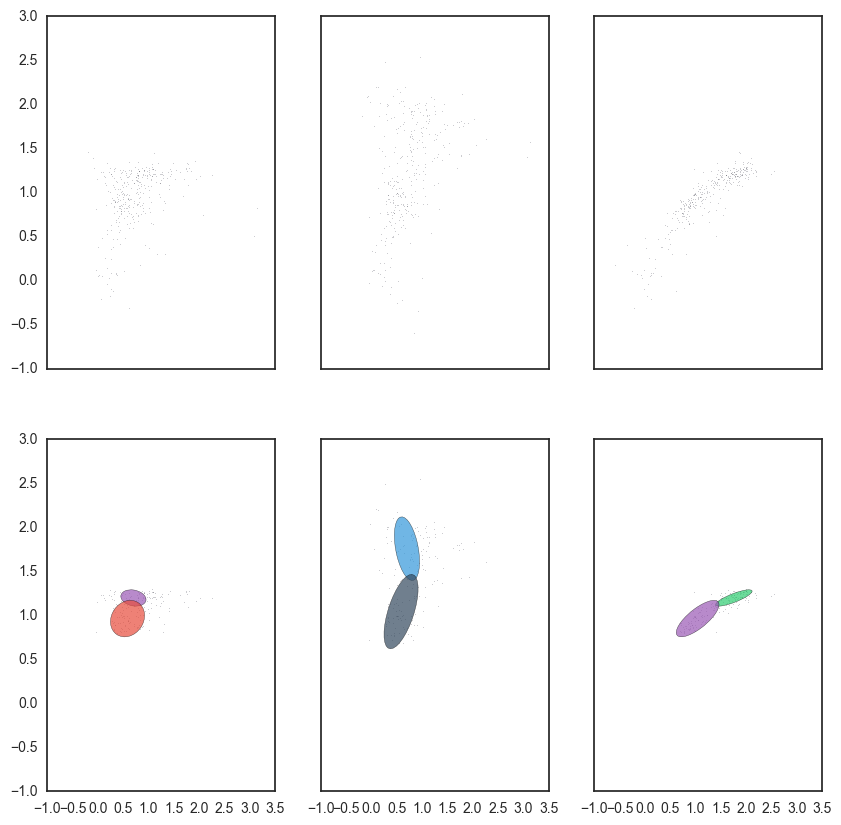

In [87]:
fig , axs = plt.subplots(nrows=2, ncols=3 , sharex=True, sharey=True, figsize=(10,10))


axs[0,0].scatter(color[0,:],color[2,:], s =.01)
axs[1,0].scatter(color[0,mask],color[2,mask] , s = .01)
for i in range(clf.n_components):

    draw_ellipse(np.delete(clf.mu[i],1,0) , np.delete(np.delete(clf.V[i],1,1),1,0) 
             , ax = axs[1,0] ,  scales=[2] , ec='k', fc=next(palette) , alpha = 0.7)


#axs[0,0].set_xlim(0,3)
#axs[0,0].set_ylim(0,1)
#axs[1,0].set_xlim(0,3)
#axs[1,0].set_ylim(0,1)

axs[0,1].scatter(color[0,:],color[1,:], s = .01)
axs[1,1].scatter(color[0,mask],color[1,mask],s= .01)
for i in range(clf.n_components):

     draw_ellipse(np.delete(clf.mu[i],2,0), np.delete(np.delete(clf.V[i],2,1),2,0) 
             , ax = axs[1,1],  scales=[2] , ec='k', fc=next(palette) , alpha = 0.7)


#axs[0,1].set_xlim(0,3)
#axs[0,1].set_ylim(0,3)
#axs[1,1].set_xlim(0,3)
#axs[1,1].set_ylim(0,3)

axs[0,2].scatter(color[1,:],color[2,:],s= .01)

axs[1,2].scatter(color[1,mask],color[2,mask],s= .01)
for i in range(clf.n_components):
    draw_ellipse(np.delete(clf.mu[i],0,0), np.delete(np.delete(clf.V[i],0,1),0,0) 
             , ax = axs[1,2],  scales=[2] , ec='k', fc=next(palette) , alpha = 0.7)



#axs[0,2].set_xlim(0,3)
#axs[0,2].set_ylim(0,1)
#axs[1,2].set_xlim(0,3)
#axs[1,2].set_ylim(0,1)

In [88]:
pure_index = np.where(clf.alpha == clf.alpha.max())[0]
mu_pure , V_pure = clf.mu[pure_index] , clf.V[pure_index][0]
dY_pure = Y_xd - mu_pure
V_pure_inv = np.linalg.inv(V_pure)
VdY = np.tensordot(V_pure_inv, dY_pure , axes=(1,1))
chi = np.sum(dY_pure.T * VdY , axis = 0)
pure_mask = chi<2

In [89]:
pure_index = np.where(clf.mu[:,1] == clf.mu[:,1].max())
mu_pure , V_pure = clf.mu[pure_index] , clf.V[pure_index][0]
dY_pure = Y_xd - mu_pure
V_pure_inv = np.linalg.inv(V_pure)
VdY = np.tensordot(V_pure_inv, dY_pure , axes=(1,1))

In [90]:
P = np.linalg.inv(V_pure + Yerr_xd)
chi = np.einsum('mn,mn->m', np.einsum('ijk,ik->ij', P, dY_pure) , dY_pure)
pure_mask = chi<2

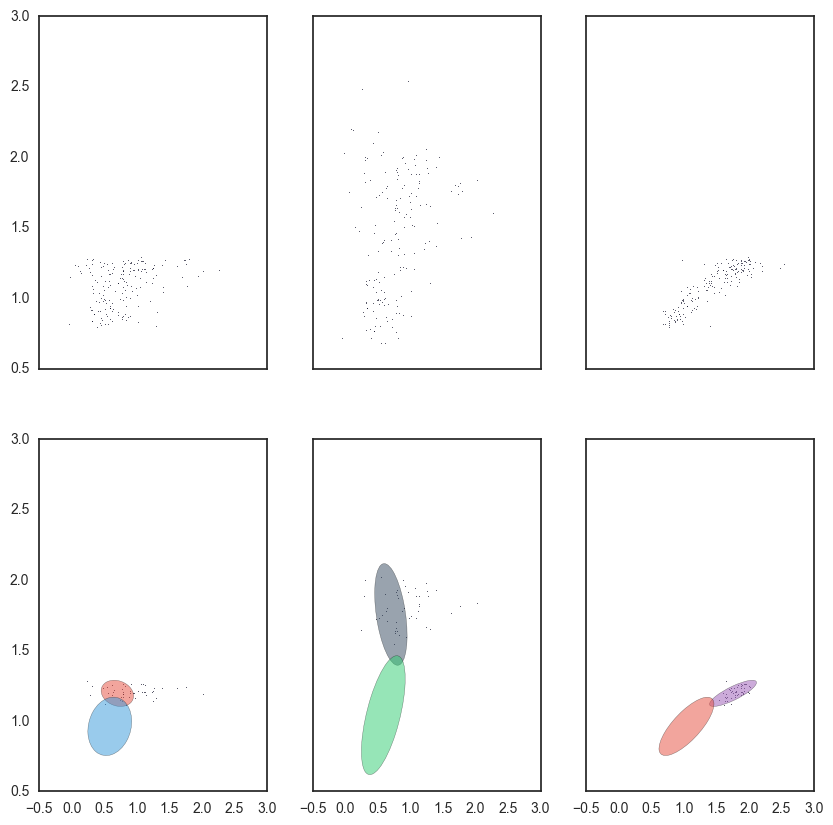

In [91]:
fig , axs = plt.subplots(nrows=2, ncols=3 , sharex=True, sharey=True, figsize=(10,10))

axs[0,0].scatter(Y_xd[:,0],Y_xd[:,2] , s = 0.1)
axs[1,0].scatter(Y_xd[pure_mask,0],Y_xd[pure_mask,2] , s = 0.1)
for i in range(clf.n_components):

    draw_ellipse(np.delete(clf.mu[i],1,0) , np.delete(np.delete(clf.V[i],1,1),1,0) 
             , ax = axs[1,0] ,  scales=[2] , ec='k', fc=next(palette) , alpha = 0.5)


#axs[0,0].set_xlim(0,3)
#axs[0,0].set_ylim(0,1)
#axs[1,0].set_xlim(0,3)
#axs[1,0].set_ylim(0,1)

axs[0,1].scatter(Y_xd[:,0],Y_xd[:,1] , s = 0.1)
axs[1,1].scatter(Y_xd[pure_mask,0],Y_xd[pure_mask,1] , s = 0.1)
for i in range(clf.n_components):

     draw_ellipse(np.delete(clf.mu[i],2,0), np.delete(np.delete(clf.V[i],2,1),2,0) 
             , ax = axs[1,1],  scales=[2] , ec='k', fc=next(palette) , alpha = 0.5)


#axs[0,1].set_xlim(0,3)
#axs[0,1].set_ylim(0,3)
#axs[1,1].set_xlim(0,3)
#axs[1,1].set_ylim(0,3)

axs[0,2].scatter(Y_xd[:,1],Y_xd[:,2] , s =0.1)
axs[1,2].scatter(Y_xd[pure_mask,1],Y_xd[pure_mask,2] , s = 0.1)

for i in range(clf.n_components):
    draw_ellipse(np.delete(clf.mu[i],0,0), np.delete(np.delete(clf.V[i],0,1),0,0) 
             , ax = axs[1,2],  scales=[2] , ec='k', fc=next(palette) , alpha = 0.5)
#axs[0,2].set_xlim(0,3)
#axs[0,2].set_ylim(0,1)
#axs[1,2].set_xlim(0,3)
#axs[1,2].set_ylim(0,1)

-0.298247801883 0.766632406247 0.1


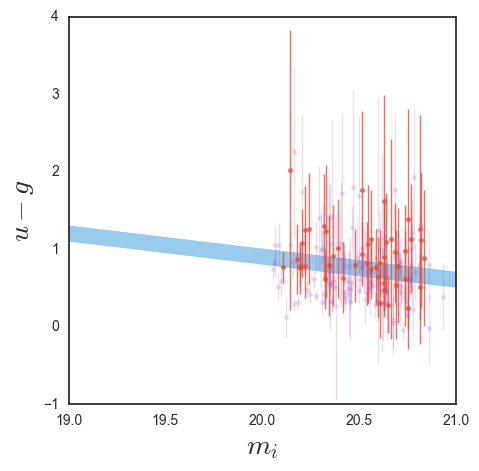

In [92]:
result = op.minimize(nll, [0.0, 2, -1], 
                     args=(mi_xd[pure_mask], Y_xd[pure_mask,0], Yerr_xd[pure_mask,0,0]**.5, mu_red[0,0]), 
                     method = 'TNC' , bounds = ((-0.5, 0.5), (0, 3) , (np.log(0.1), None)))

m_ml, b_ml, lnf_ml = result["x"]
print m_ml , b_ml , np.exp(lnf_ml)
plt.figure(figsize=(5,5))
mi = np.linspace(16,22,1000)

plt.errorbar(mi_xd[~pure_mask], Y_xd[~pure_mask,0] , yerr= Yerr_xd[~pure_mask,0,0]**.5 , 
             fmt = '.' , capsize = 0, alpha =0.2 , elinewidth=1)

plt.errorbar(mi_xd[pure_mask], Y_xd[pure_mask,0] , yerr= Yerr_xd[pure_mask,0,0]**.5 , 
             fmt = '.' , capsize = 0, alpha =0.8 , elinewidth=1)

#plt.plot(mi , m_ml*(mi-mu_red[0,0]) + b_ml)
68
plt.fill_between(mi , m_ml*(mi-mu_red[0,0]) + b_ml - np.exp(lnf_ml)  , 
                 m_ml*(mi-mu_red[0,0]) + b_ml + np.exp(lnf_ml) , alpha = 0.5 , color = next(palette))
plt.xlim([19,21])
plt.xlabel(r"$m_i$" , fontsize = 20)
plt.ylabel(r"$u-g$" , fontsize = 20)

0.114309236019 1.77464581265 0.0739858287085 20.4676903704


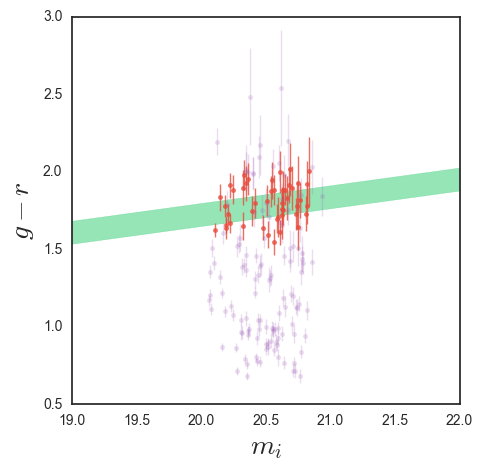

In [94]:
result = op.minimize(nll, [0.0, mu_red[0,1], -1], 
                     args=(mi_xd[pure_mask], Y_xd[pure_mask,1], Yerr_xd[pure_mask,1,1]**.5, mu_red[0,0]), 
                     method = 'TNC' , bounds = ((-0.2, 0.2), (0, 3) , (np.log(0.04), None)))

m_ml, b_ml, lnf_ml = result["x"]
print m_ml , b_ml , np.exp(lnf_ml) , mu_red[0,0]
plt.figure(figsize=(5,5))
mi = np.linspace(16,22,1000)

plt.errorbar(mi_xd[~pure_mask], Y_xd[~pure_mask,1] , yerr= Yerr_xd[~pure_mask,1,1]**.5 , 
             fmt = '.' , capsize = 0, alpha =0.2 , elinewidth=1)

plt.errorbar(mi_xd[pure_mask], Y_xd[pure_mask,1] , yerr= Yerr_xd[pure_mask,1,1]**.5 , 
             fmt = '.' , capsize = 0, alpha =0.8 , elinewidth=1)

plt.fill_between(mi , m_ml*(mi-mu_red[0,0]) + b_ml - np.exp(lnf_ml)  , 
                 m_ml*(mi-mu_red[0,0]) + b_ml + np.exp(lnf_ml) , alpha = 0.5 , color = next(palette))
plt.xlim([19,22])
plt.xlabel(r"$m_i$" , fontsize = 20)
plt.ylabel(r"$g-r$" , fontsize = 20)

0.0404131215254 1.20267934711 0.0194930798585 20.4676903704


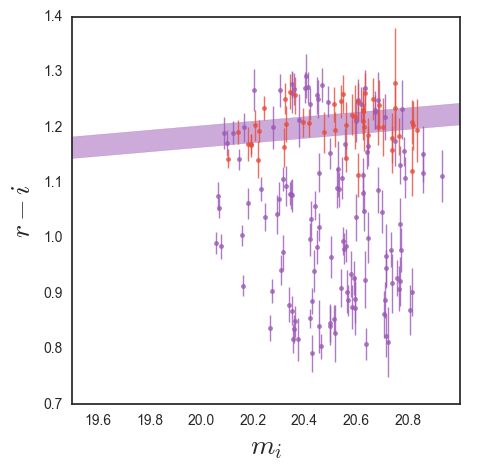

In [95]:

result = op.minimize(nll, [0.0, mu_red[0,1], np.log(V_red[1,1]**.5)], 
                     args=(mi_xd[pure_mask], Y_xd[pure_mask,2], Yerr_xd[pure_mask,2,2]**.5, mu_red[0,0]))

m_ml, b_ml, lnf_ml = result["x"]
print m_ml , b_ml , np.exp(lnf_ml) , mu_red[0,0]
plt.figure(figsize=(5,5))
mi = np.linspace(16,22,1000)


plt.errorbar(mi_xd[~pure_mask], Y_xd[~pure_mask,2] , yerr= Yerr_xd[~pure_mask,2,2]**.5 , 
             fmt = '.' , capsize = 0, alpha =0.8 , elinewidth=1)

plt.errorbar(mi_xd[pure_mask], Y_xd[pure_mask,2] , yerr= Yerr_xd[pure_mask,2,2]**.5 , 
             fmt = '.' , capsize = 0, alpha =0.8 , elinewidth=1)
#plt.errorbar(Y[mask,0], dpp[10,mask] , yerr= (dpp[6,mask]**2+dpp[7,mask]**2)**.5, 
#             fmt = '.' , capsize = 0, alpha =0.2 , elinewidth=1)

plt.fill_between(mi , m_ml*(mi-mu_red[0,0]) + b_ml - np.exp(lnf_ml)  , 
                 m_ml*(mi-mu_red[0,0]) + b_ml + np.exp(lnf_ml) , alpha = 0.5 , color = next(palette))
plt.xlim([19.5,21])
plt.xlabel(r"$m_i$" , fontsize = 20)
plt.ylabel(r"$r-i$" , fontsize = 20)

<Container object of 3 artists>

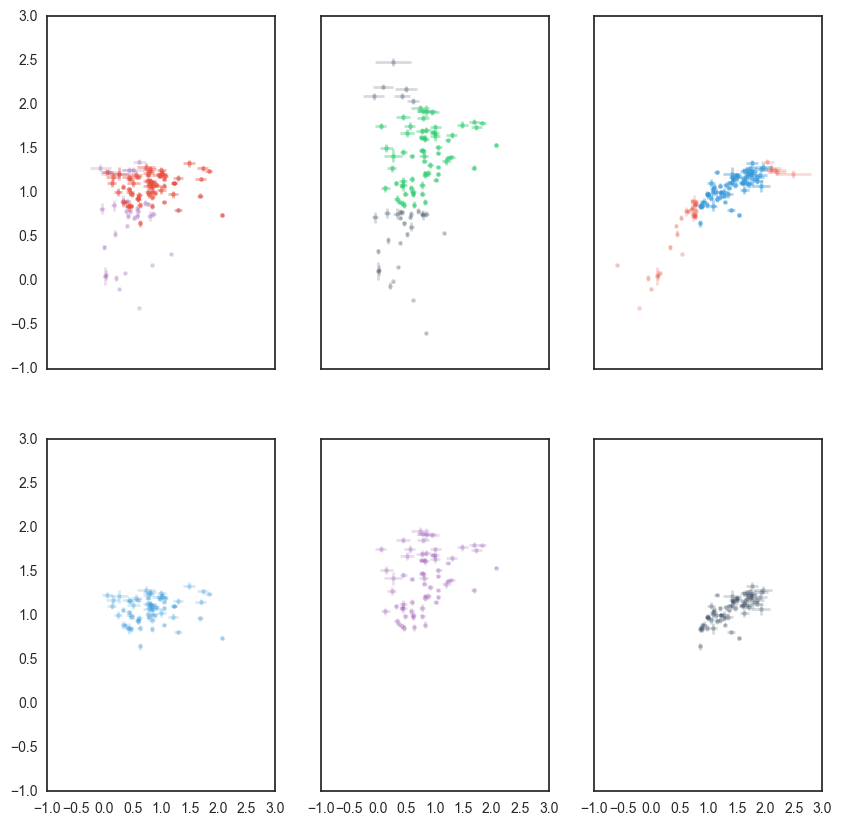

In [179]:
fig , axs = plt.subplots(nrows=2, ncols=3 , sharex= True, sharey= True, figsize=(10,10))

axs[0,0].errorbar(dpp[8,~mask], dpp[10,~mask] , xerr= (dpp[5,~mask]**2 + dpp[6,~mask]**2)**0.5 , 
             yerr = (dpp[6,~mask]**2 + dpp[7,~mask]**2)**0.5,
             fmt = '.' , capsize = 0, alpha =0.2 , elinewidth=2,color = next(palette))
axs[0,0].errorbar(dpp[8,mask], dpp[10,mask] , xerr= (dpp[5,mask]**2 + dpp[6,mask]**2)**0.5 , 
             yerr = (dpp[6,mask]**2 + dpp[7,mask]**2)**0.5,
             fmt = '.' , capsize = 0, alpha =0.4 , elinewidth=2 , color = next(palette))

axs[1,0].errorbar(dpp[8,mask], dpp[10,mask] , xerr= (dpp[5,mask]**2 + dpp[6,mask]**2)**0.5 , 
             yerr = (dpp[6,mask]**2 + dpp[7,mask]**2)**0.5,
             fmt = '.' , capsize = 0, alpha =0.2 , elinewidth=2 , color = next(palette))
#axs[0,0].set_xlim(0,3)
#axs[0,0].set_ylim(0,1)
#axs[1,0].set_xlim(0,3)
#axs[1,0].set_ylim(0,1)

axs[0,1].errorbar(dpp[8,~mask], dpp[9,~mask] , xerr= (dpp[5,~mask]**2 + dpp[6,~mask]**2)**0.5 , 
             yerr = (dpp[6,~mask]**2 + dpp[7,~mask]**2)**0.5,
             fmt = '.' , capsize = 0, alpha =0.2 , elinewidth=2,color = next(palette))
axs[0,1].errorbar(dpp[8,mask], dpp[9,mask] , xerr= (dpp[5,mask]**2 + dpp[6,mask]**2)**0.5 , 
             yerr = (dpp[6,mask]**2 + dpp[7,mask]**2)**0.5,
             fmt = '.' , capsize = 0, alpha =0.4 , elinewidth=2 , color = next(palette))

axs[1,1].errorbar(dpp[8,mask], dpp[9,mask] , xerr= (dpp[5,mask]**2 + dpp[6,mask]**2)**0.5 , 
             yerr = (dpp[6,mask]**2 + dpp[7,mask]**2)**0.5,
             fmt = '.' , capsize = 0, alpha =0.2 , elinewidth=2 , color = next(palette))
#axs[0,1].set_xlim(0,3)
#axs[0,1].set_ylim(0,3)
#axs[1,1].set_xlim(0,3)
#axs[1,1].set_ylim(0,3)

axs[0,2].errorbar(dpp[9,~mask], dpp[10,~mask] , xerr= (dpp[5,~mask]**2 + dpp[6,~mask]**2)**0.5 , 
             yerr = (dpp[6,~mask]**2 + dpp[7,~mask]**2)**0.5,
             fmt = '.' , capsize = 0, alpha =0.2 , elinewidth=2,color = next(palette))
axs[0,2].errorbar(dpp[9,mask], dpp[10,mask] , xerr= (dpp[5,mask]**2 + dpp[6,mask]**2)**0.5 , 
             yerr = (dpp[6,mask]**2 + dpp[7,mask]**2)**0.5,
             fmt = '.' , capsize = 0, alpha =0.4 , elinewidth=2,color = next(palette))
axs[1,2].errorbar(dpp[9,mask], dpp[10,mask] , xerr= (dpp[5,mask]**2 + dpp[6,mask]**2)**0.5 , 
             yerr = (dpp[6,mask]**2 + dpp[7,mask]**2)**0.5,
             fmt = '.' , capsize = 0, alpha =0.2 , elinewidth=2 , color = next(palette))
#axs[0,2].set_xlim(0,3)
#axs[0,2].set_ylim(0,1)
#axs[1,2].set_xlim(0,3)
#axs[1,2].set_ylim(0,1)

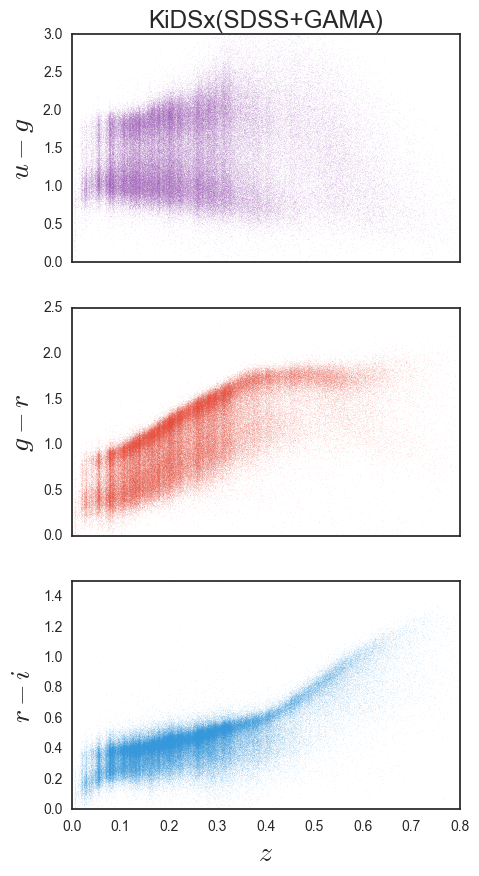

In [9]:
fig , ax = plt.subplots(nrows=3,ncols=1 , figsize=(5,10))
ax[0].scatter(dp[11,:] , dp[8,:] , s = 0.001 , color = next(palette))
ax[1].scatter(dp[11,:] , dp[9,:] , s = 0.001, color = next(palette))
ax[2].scatter(dp[11,:] , dp[10,:] , s = 0.001, color = next(palette))
ax[0].set_xlim(0,0.8)
ax[0].set_ylim(0,3)
ax[0].set_xticks([])

ax[1].set_xlim(0,0.8)
ax[1].set_ylim(0,2.5)
ax[1].set_xticks([])

ax[2].set_xlim(0,0.8)
ax[2].set_ylim(0,1.5)
ax[2].set_xlabel(r"$z$" , fontsize = 20)
ax[0].set_ylabel(r"$u-g$" , fontsize = 20)
ax[1].set_ylabel(r"$g-r$" , fontsize = 20)
ax[2].set_ylabel(r"$r-i$" , fontsize = 20)

ax[0].set_title("KiDSx(SDSS+GAMA)" , fontsize = 17.5)


(28687, 15)
(30114, 15)


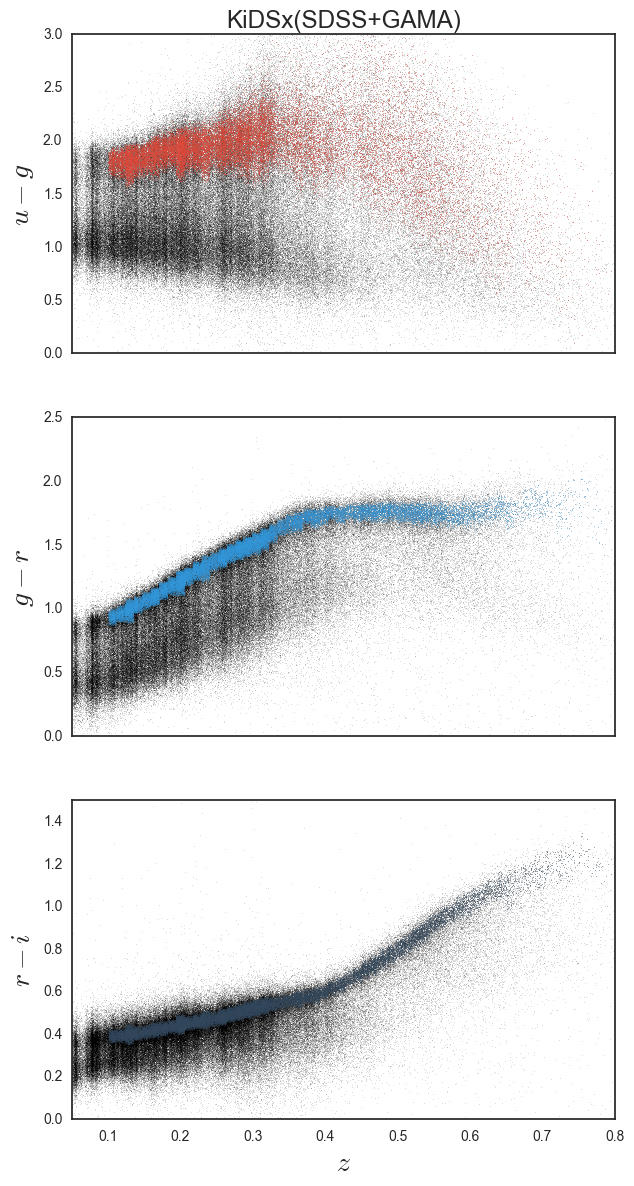

In [102]:
import h5py
red_cat = h5py.File("red_cat.hdf5","r")["red"][:]
print red_cat.shape
red_cat = h5py.File("red_cat_sures.hdf5","r")["red"][:]
print red_cat.shape
#red_cat = h5py.File("red_cat_sures.hdf5","r")["red"][:]
#print red_cat.shape

fig , ax = plt.subplots(nrows=3,ncols=1 , figsize=(7,14))
ax[0].scatter(dp[11,:] , dp[8,:] , s = 0.005 , color = "k")
ax[0].scatter(red_cat[:,0] , red_cat[:,3] , s = 0.03 , color = next(palette))
ax[1].scatter(dp[11,:] , dp[9,:] , s = 0.005 , color = "k")
ax[1].scatter(red_cat[:,0] , red_cat[:,4] , s = 0.03, color = next(palette))
ax[2].scatter(dp[11,:] , dp[10,:] , s = 0.005 , color = "k")
ax[2].scatter(red_cat[:,0] , red_cat[:,5] , s = 0.03, color = next(palette))
ax[0].set_xlim(0.05,0.8)
ax[0].set_ylim(0,3)
ax[0].set_xticks([])

ax[1].set_xlim(0.05,0.8)
ax[1].set_ylim(0,2.5)
ax[1].set_xticks([])

ax[2].set_xlim(0.05,0.8)
ax[2].set_ylim(0,1.5)
ax[2].set_xlabel(r"$z$" , fontsize = 20)
ax[0].set_ylabel(r"$u-g$" , fontsize = 20)
ax[1].set_ylabel(r"$g-r$" , fontsize = 20)
ax[2].set_ylabel(r"$r-i$" , fontsize = 20)

ax[0].set_title("KiDSx(SDSS+GAMA)" , fontsize = 17.5)

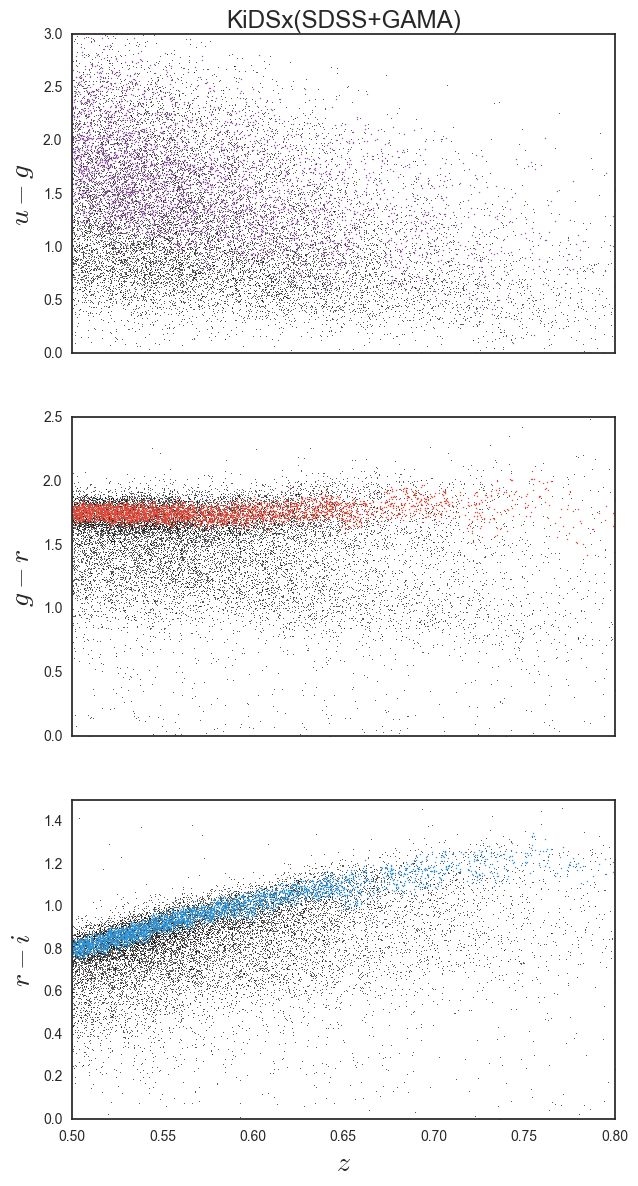

In [105]:
fig , ax = plt.subplots(nrows=3,ncols=1 , figsize=(7,14))
ax[0].scatter(dp[11,:] , dp[8,:] , s = 0.1 , color = "k")
ax[0].scatter(red_cat[:,0] , red_cat[:,3] , s = 0.5 , color = next(palette))
ax[1].scatter(dp[11,:] , dp[9,:] , s = 0.1 , color = "k")
ax[1].scatter(red_cat[:,0] , red_cat[:,4] , s = 0.5, color = next(palette))
ax[2].scatter(dp[11,:] , dp[10,:] , s = 0.1 , color = "k")
ax[2].scatter(red_cat[:,0] , red_cat[:,5] , s = 0.5, color = next(palette))
ax[0].set_xlim(0.5,0.8)
ax[0].set_ylim(0,3)
ax[0].set_xticks([])

ax[1].set_xlim(0.5,0.8)
ax[1].set_ylim(0,2.5)
ax[1].set_xticks([])

ax[2].set_xlim(0.5,0.8)
ax[2].set_ylim(0,1.5)
ax[2].set_xlabel(r"$z$" , fontsize = 20)
ax[0].set_ylabel(r"$u-g$" , fontsize = 20)
ax[1].set_ylabel(r"$g-r$" , fontsize = 20)
ax[2].set_ylabel(r"$r-i$" , fontsize = 20)

ax[0].set_title("KiDSx(SDSS+GAMA)" , fontsize = 17.5)

(14, 23)

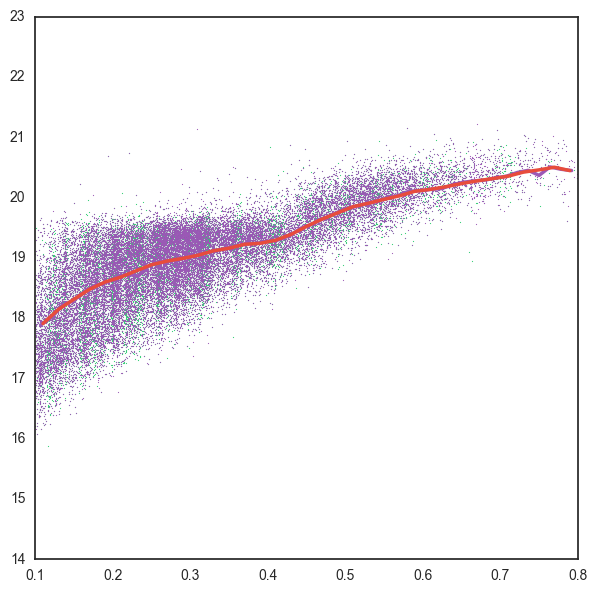

In [56]:
fig , ax = plt.subplots(nrows=1,ncols=1 , figsize=(7,7))


red_cat = h5py.File("red_cat_hires.hdf5","r")["red"][:]
mref = h5py.File("red_cat_hires.hdf5","r")["mref"][:]
ax.scatter(red_cat[:,0] , red_cat[:,1] , s = 0.3 , color = next(palette))
total_bins = 50
bins = np.linspace(red_cat[:,0].min(),red_cat[:,0].max(), total_bins+1)
delta = bins[1]-bins[0]
idx  = np.digitize(red_cat[:,0],bins)
running_median = [np.median(red_cat[:,1][idx==k]) for k in range(total_bins+1)]
ax.plot(.5*(bins[1:]+bins[:-1]) , mref)

red_cat = h5py.File("red_cat.hdf5","r")["red"][:]
mref = h5py.File("red_cat.hdf5","r")["mref"][:]
ax.scatter(red_cat[:,0] , red_cat[:,1] , s = 0.3 , color = next(palette))
total_bins = 35
bins = np.linspace(red_cat[:,0].min(),red_cat[:,0].max(), total_bins+1)
delta = bins[1]-bins[0]
idx  = np.digitize(red_cat[:,0],bins)
running_median = [np.median(red_cat[:,1][idx==k]) for k in range(total_bins+1)]
ax.plot(.5*(bins[1:]+bins[:-1]) , mref)
ax.set_xlim(0.1,0.8)
ax.set_ylim(14,23)

Populating the interactive namespace from numpy and matplotlib


/usr/lib/python2.7/site-packages/ipykernel_launcher.py:40: DeprecationWarning: `spline` is deprecated!
spline is deprecated in scipy 0.19.0, use Bspline class instead.


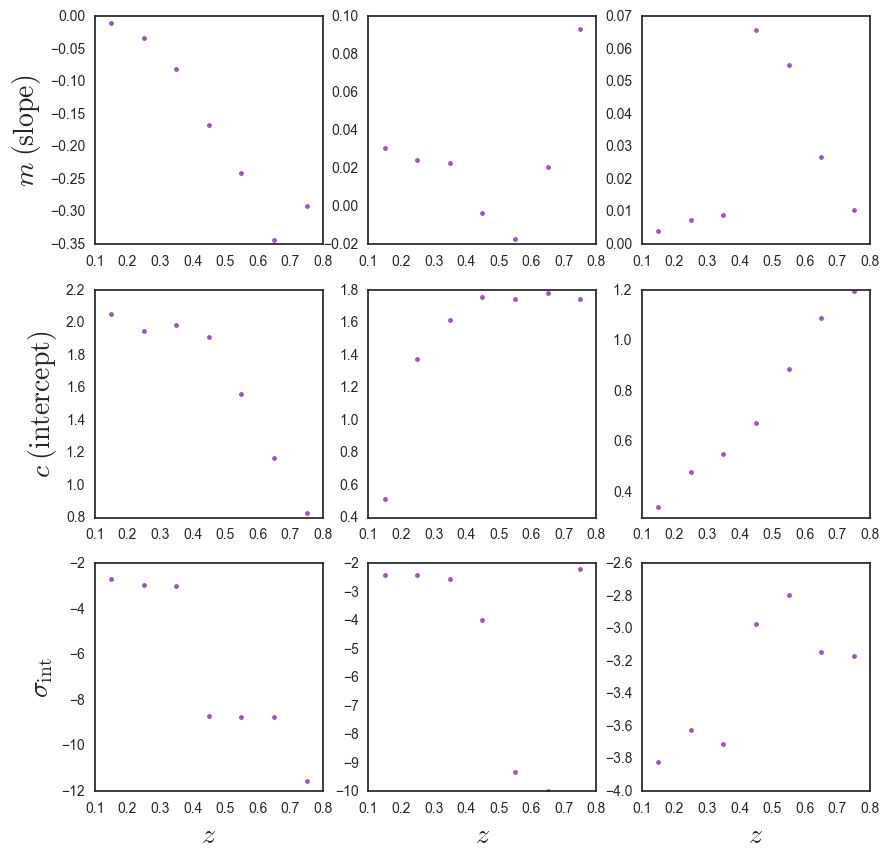

In [2]:
from scipy.interpolate import spline
from scipy.interpolate import CubicSpline
import numpy as np
import matplotlib.pyplot as plt
import h5py
%pylab inline
test = np.linspace(0.12,0.78,11)

red_par = h5py.File("red_par3d_mnods.hdf5","r")["red"][:]
bins = np.linspace(0.1, 0.8, 8)
x = .5*(bins[1:]+bins[:-1])
red_par = red_par.reshape(red_par.shape[0],3,3)
red_par[:,2,:] = np.log(red_par[:,2,:])
#test_par = spline(x , red_par , test)
#test_par = CubicSpline(x , red_par)(test)

fig , ax = plt.subplots(nrows=3,ncols=3 , figsize=(10,10))
for i in range(3):
    for j in range(3):
        #ax[i,j].plot(test , test_par[:,i,j])
        ax[i,j].plot(x , red_par[:,i,j], ".")

red_par = h5py.File("red_par.hdf5","r")["red"][:]
bins = np.linspace(0.1, 0.8, 11)
x = .5*(bins[1:]+bins[:-1])
red_par = red_par.reshape(red_par.shape[0],3,3)
#test_par = spline(x , red_par , test)
test_par = CubicSpline(x , red_par)(test)
'''
for i in range(3):
    for j in range(3):
        ax[i,j].plot(test , test_par[:,i,j])
        ax[i,j].plot(test , test_par[:,i,j], ".")        
        
'''        
bins = np.linspace(0.1, 0.8, 51)
x = .5*(bins[1:]+bins[:-1])
red_par = h5py.File("red_par_hires.hdf5","r")["red"][:]
red_par = red_par.reshape(red_par.shape[0],3,3)
test_par = spline(x , red_par , test)
#for i in range(3):
#    for j in range(3):
        #ax[i,j].plot(test , test_par[:,i,j], lw=1.0)

ax[0,0].set_ylabel(r"$m \;(\rm slope)$" , fontsize = 20) 
ax[1,0].set_ylabel(r"$c \;(\rm intercept)$" , fontsize = 20)    
ax[2,0].set_ylabel(r"$\sigma_{\rm int}$" , fontsize = 20)  

ax[2,0].set_xlabel(r"$z$" , fontsize = 20) 
ax[2,1].set_xlabel(r"$z$" , fontsize = 20)    
ax[2,2].set_xlabel(r"$z$" , fontsize = 20)

In [ ]:
dpp = np.hstack([gama_reduction() , sdss_reduction() , cosmos_reduction()])
dc = cosmos_reduction()

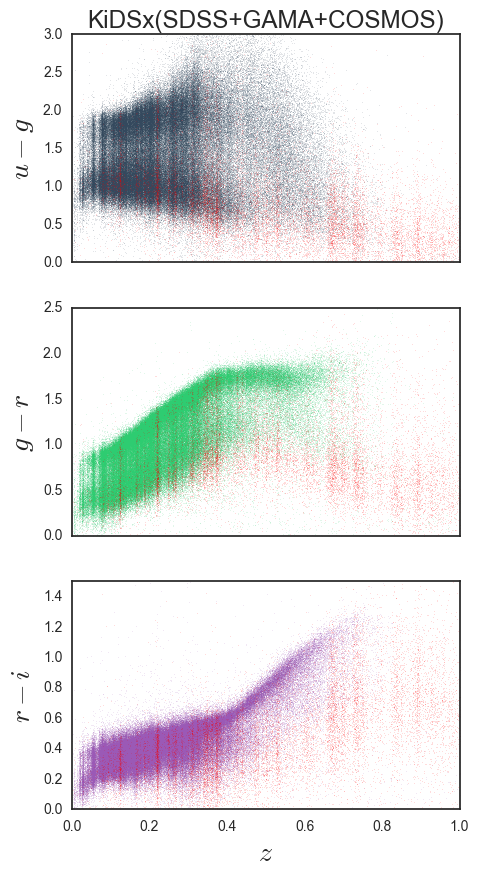

In [546]:
fig , ax = plt.subplots(nrows=3,ncols=1 , figsize=(5,10))

ax[0].scatter(dp[11,:] , dp[8,:] , s = 0.005 ,  color = next(palette))
ax[0].scatter(dc[11,:] , dc[8,:] , s = 0.005 , color = "r" , alpha = 1)
ax[1].scatter(dp[11,:] , dp[9,:] , s = 0.005,  color = next(palette))
ax[1].scatter(dc[11,:] , dc[9,:] , s = 0.005 , color = "r", alpha = 1)
ax[2].scatter(dp[11,:] , dp[10,:] , s = 0.005,  color = next(palette))
ax[2].scatter(dc[11,:] , dc[10,:] , s = 0.005 , color = "r", alpha = 1)

ax[0].set_xlim(0,1.0)
ax[0].set_ylim(0,3)
ax[0].set_xticks([])
ax[1].set_xlim(0,1.0)
ax[1].set_ylim(0,2.5)
ax[1].set_xticks([])
ax[2].set_xlim(0,1.0)
ax[2].set_ylim(0,1.5)
ax[2].set_xlabel(r"$z$" , fontsize = 20)
ax[0].set_ylabel(r"$u-g$" , fontsize = 20)
ax[1].set_ylabel(r"$g-r$" , fontsize = 20)
ax[2].set_ylabel(r"$r-i$" , fontsize = 20)

ax[0].set_title("KiDSx(SDSS+GAMA+COSMOS)" , fontsize = 17.5)


In [3]:
opt = np.loadtxt("opt_theta.txt")

In [4]:
Nb , Nm, Nf = 15, 8, 6

In [5]:
mopt=opt[0:3*(Nm-1)].reshape(Nm-1,3)
bopt = opt[3*(Nm-1):3*(Nm+Nb-2)].reshape(Nb-1,3)
lnfopt = opt[3*(Nm+Nb-2):].reshape(Nf-1,3)

In [22]:
z_init , z_fin = 0.1, 0.7

In [23]:
bnod = np.linspace(z_init,z_fin,Nb)
mnod = np.linspace(z_init,z_fin,Nm)
fnod = np.linspace(z_init,z_fin,Nf)
xrefnod = np.linspace(z_init,z_fin,20)
bnod = .5*(bnod[1:]+bnod[:-1])
fnod = .5*(fnod[1:]+fnod[:-1])
mnod = .5*(mnod[1:]+mnod[:-1])

In [24]:
z = np.linspace(z_init, z_fin, 1000)

In [25]:
from scipy.interpolate import CubicSpline
bz = CubicSpline(bnod[:] , bopt[:])(z)
mz = CubicSpline(mnod[:] , mopt[:])(z)
lnfz = CubicSpline(fnod[:] , lnfopt[:])(z)

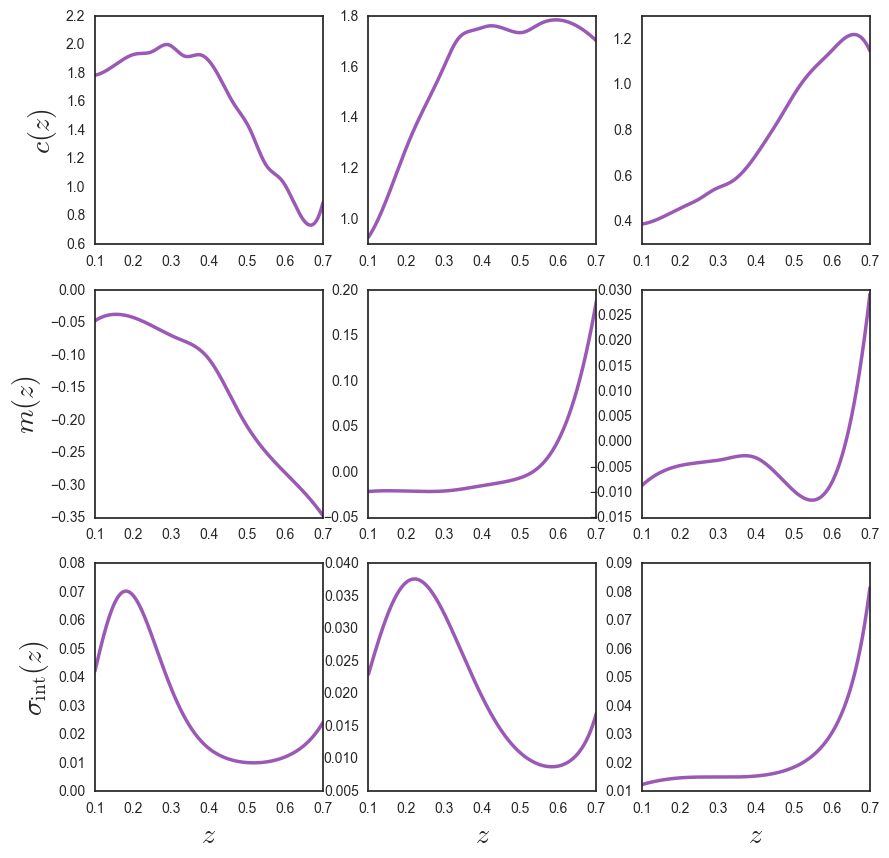

In [26]:
fig , ax = plt.subplots(nrows=3,ncols=3 , figsize=(10,10))
for i in range(3):
    for j in range(3):
        if i == 0:
            ax[i,j].plot(z , bz[:,j])
        if i == 1:
            ax[i,j].plot(z , mz[:,j])
        if i == 2:
            ax[i,j].plot(z , np.exp(lnfz[:,j])) 
ax[0,0].set_ylabel(r"$c(z) $" , fontsize = 20) 
ax[1,0].set_ylabel(r"$m(z) $" , fontsize = 20)    
ax[2,0].set_ylabel(r"$\sigma_{\rm int}(z)$" , fontsize = 20)  

ax[2,0].set_xlabel(r"$z$" , fontsize = 20) 
ax[2,1].set_xlabel(r"$z$" , fontsize = 20)    
ax[2,2].set_xlabel(r"$z$" , fontsize = 20)            

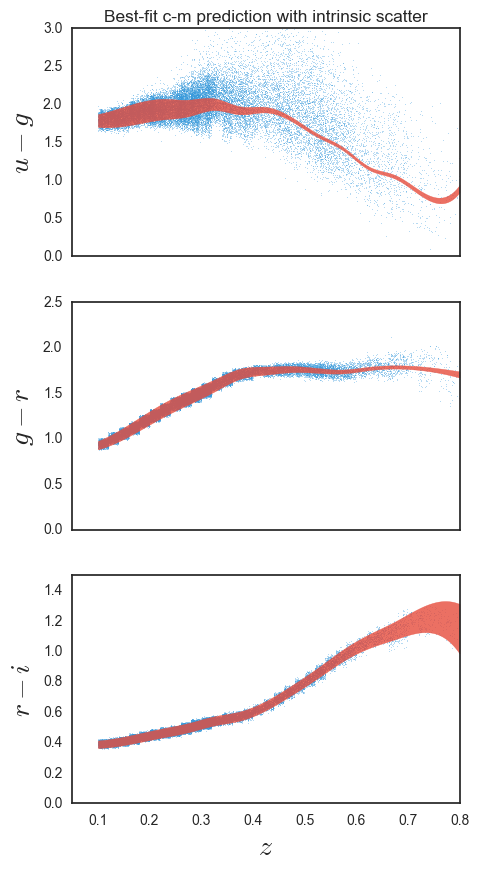

In [11]:
import h5py
red_cat = h5py.File("red_cat.hdf5","r")["red"][:]

rand_index = np.random.randint

fig , ax = plt.subplots(nrows=3,ncols=1 , figsize=(5,10))
#ax[0].scatter(dp[11,:] , dp[8,:] , s = 0.005 , color = "k")
ax[0].scatter(red_cat[:,0] , red_cat[:,3] , s = 0.03 , color = "#3498db")
#ax[1].scatter(dp[11,:] , dp[9,:] , s = 0.005 , color = "k")
ax[1].scatter(red_cat[:,0] , red_cat[:,4] , s = 0.03, color = "#3498db")
#ax[2].scatter(dp[11,:] , dp[10,:] , s = 0.005 , color = "k")
ax[2].scatter(red_cat[:,0] , red_cat[:,5] , s = 0.03, color = "#3498db")

for j in range(3):
    #ax[j].plot(z , bz[:,j] , color = "#34495e")
    #ax[j].plot(z , bz[:,j]+2*np.exp(lnfz[:,j]) , color = "#34495e")
    #ax[j].plot(z , bz[:,j]-2*np.exp(lnfz[:,j]) , color = "#34495e")
    ax[j].fill_between(z , bz[:,j]-2*np.exp(lnfz[:,j]) , bz[:,j]+2*np.exp(lnfz[:,j]) , color = "#e74c3c", alpha = 0.8)

ax[0].set_xlim(0.05,0.8)
ax[0].set_ylim(0,3)
ax[0].set_xticks([])

ax[1].set_xlim(0.05,0.8)
ax[1].set_ylim(0,2.5)
ax[1].set_xticks([])

ax[2].set_xlim(0.05,0.8)
ax[2].set_ylim(0,1.5)
ax[2].set_xlabel(r"$z$" , fontsize = 20)
ax[0].set_ylabel(r"$u-g$" , fontsize = 20)
ax[1].set_ylabel(r"$g-r$" , fontsize = 20)
ax[2].set_ylabel(r"$r-i$" , fontsize = 20)

ax[0].set_title("Best-fit c-m prediction with intrinsic scatter" , fontsize = 12.5)

In [111]:
import ezgal
model = ezgal.model("/net/delft/data2/vakili/easy/ezgal_models/www.baryons.org/ezgal/models/bc03_burst_0.1_z_0.02_chab.model")
model.add_filter("/net/delft/data2/vakili/easy/u.dat" , "u" , units = "nm")
model.add_filter("/net/delft/data2/vakili/easy/g.dat" , "g" , units = "nm")
model.add_filter("/net/delft/data2/vakili/easy/r.dat" , "r" , units = "nm")
model.add_filter("/net/delft/data2/vakili/easy/i.dat" , "i" , units = "nm")
def mstar(z):
    
    return 22.44+3.36*np.log(z)+0.273*np.log(z)**2-0.0618*np.log(z)**3-0.0227*np.log(z)**4

In [134]:
def function1(zs , zf, Z):
    model = ezgal.model("/net/delft/data2/vakili/easy/ezgal_models/www.baryons.org/ezgal/models/bc03_burst_0.1_z_"+str(Z)+"_chab.model")
    model.add_filter("/net/delft/data2/vakili/easy/u.dat" , "u" , units = "nm")
    model.add_filter("/net/delft/data2/vakili/easy/g.dat" , "g" , units = "nm")
    model.add_filter("/net/delft/data2/vakili/easy/r.dat" , "r" , units = "nm")
    model.add_filter("/net/delft/data2/vakili/easy/i.dat" , "i" , units = "nm")
    kcorr_sloan = model.get_kcorrects(zf=zf , zs = 0.25 , filters = "sloan_i")
    model.set_normalization("sloan_i" , 0.25 , mstar(0.25) - kcorr_sloan, vega=False, apparent=True)
    magu = model.get_apparent_mags(zf=zf , filters = "u" , zs= zs)
    magg = model.get_apparent_mags(zf=zf , filters = "g" , zs= zs)
    magr = model.get_apparent_mags(zf=zf , filters = "r" , zs= zs)
    magi = model.get_apparent_mags(zf=zf , filters = "i" , zs= zs)
    
    return magu , magg, magr, magi

In [135]:
import h5py
red_cat = h5py.File("red_cat.hdf5","r")["red"][:]
zs = red_cat[:,0]

In [136]:
u1 , g1 , r1, z1 = function1(zs , 5, 0.02)
u2 , g2 , r2, z2 = function1(zs , 3, 0.02)
u3 , g3 , r3, z3 = function1(zs , 5, 0.008)
u4 , g4 , r4, z4 = function1(zs , 3, 0.008)

In [137]:
u5, g5, r5, z5 = function1(zs, 4, 0.008)
u6, g6, r6, z6 = function1(zs, 4, 0.02)

In [138]:
U = np.vstack([u1,u2,u3,u4,u5,u6])
G = np.vstack([g1,g2,g3,g4,g5,g6])
R = np.vstack([r1,r2,r3,r4,r5,r6])
I = np.vstack([z1,z2,z3,z4,z5,z6])

In [139]:
Um , Us = np.mean(U, axis=0), np.std(U, axis=0)
Gm , Gs = np.mean(G, axis=0), np.std(G, axis=0)
Rm , Rs = np.mean(R, axis=0), np.std(R, axis=0)
Im , Is = np.mean(I, axis=0), np.std(I, axis=0)

In [140]:
Um += np.random.normal(np.zeros_like(Um), Us)
Gm += np.random.normal(np.zeros_like(Gm), Gs)
Rm += np.random.normal(np.zeros_like(Rm), Rs)
Im += np.random.normal(np.zeros_like(Im), Is)

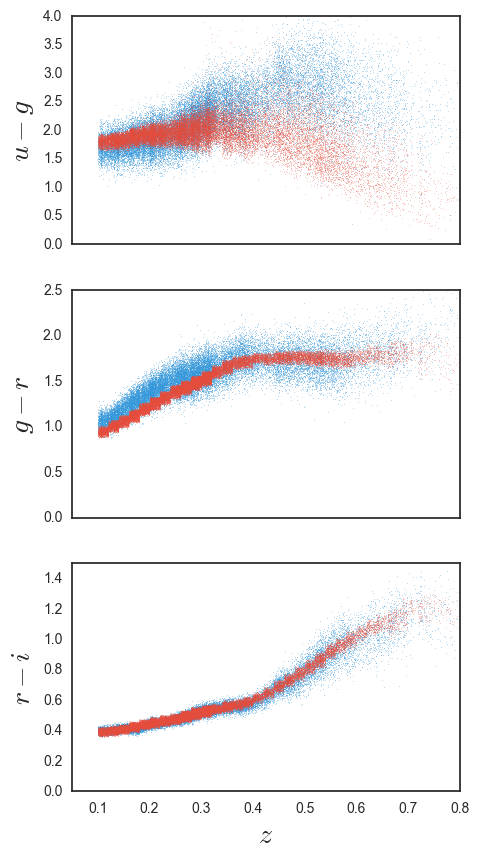

In [147]:
fig , ax = plt.subplots(nrows=3,ncols=1 , figsize=(5,10))
ax[0].scatter(zs , Um-Gm , s = 0.03 , color = "#3498db")
ax[1].scatter(zs , Gm-Rm , s = 0.03, color = "#3498db")
ax[2].scatter(zs , Rm-Im , s = 0.03, color = "#3498db")

ax[0].scatter(red_cat[:,0] , red_cat[:,3] , s = 0.02 , color = "#e74c3c")
ax[1].scatter(red_cat[:,0] , red_cat[:,4] , s = 0.02 , color = "#e74c3c")
ax[2].scatter(red_cat[:,0] , red_cat[:,5] , s = 0.02 , color = "#e74c3c")


ax[0].set_xlim(0.05,0.8)
ax[0].set_ylim(0,4)
ax[0].set_xticks([])

ax[1].set_xlim(0.05,0.8)
ax[1].set_ylim(0,2.5)
ax[1].set_xticks([])

ax[2].set_xlim(0.05,0.8)
ax[2].set_ylim(0,1.5)
ax[2].set_xlabel(r"$z$" , fontsize = 20)
ax[0].set_ylabel(r"$u-g$" , fontsize = 20)
ax[1].set_ylabel(r"$g-r$" , fontsize = 20)
ax[2].set_ylabel(r"$r-i$" , fontsize = 20)


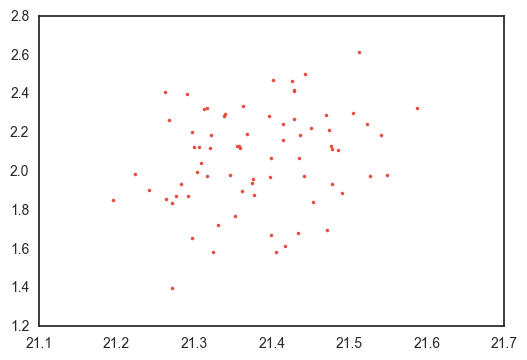

In [154]:
mask = (zs<0.8)&(zs>0.75)
plt.scatter(Im[mask], Gm[mask]-Rm[mask],s = 5 , color = "#e74c3c")